In [1]:
# Let us sample from different distributions 

# Bernoulli
import numpy as  np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson, uniform, expon, geom

p=0.9
nSamples=1000
# success = red
Xb = bernoulli(p) # define a Bernoulli r.v.
Xb_samples = Xb.rvs(nSamples) # sampling from a Bernoulli

xb_prop = [np.sum(Xb_samples==i)/nSamples for i in range(2)];
plt.bar(range(2), xb_prop, width=0.1)

print(np.mean(Xb_samples))
print(np.var(Xb_samples))
print(p*(1-p))

0.909
0.08271900000000001
0.08999999999999998


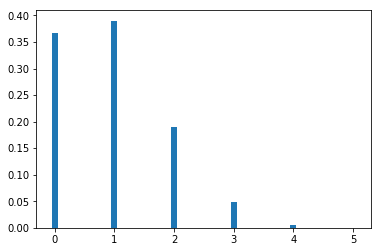

In [2]:
# Let us sample from different distributions and compute the sample mean

# Binomial
p= 0.2
n = 5
Xbin = binom(n,p)
Xbin_samples = Xbin.rvs(nSamples)

xbin_prop = [np.sum(Xbin_samples==i)/nSamples for i in range(n+1)]
plt.bar(range(n+1), xbin_prop, width=0.1);


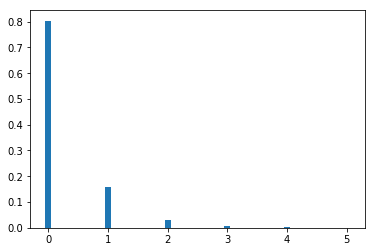

In [4]:
# Let us sample from different distributions and compute the sample mean

# Geometric
p= 0.8
nSamples=10000
Xg = geom(p,-1)
Xg_samples = Xg.rvs(nSamples)

xg_prop = [np.sum(Xg_samples==i)/nSamples for i in range(n+1)];
plt.bar(range(n+1), xg_prop, width=0.1);


3.0185
2.98915775


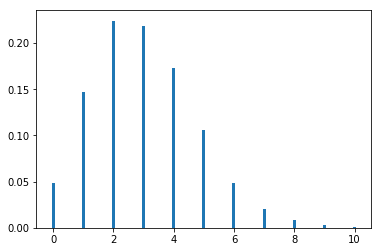

In [5]:
# Poisson
l =3
Xp = poisson(l)
Xp_samples = Xp.rvs(nSamples)
print(np.mean(Xp_samples))
print(np.var(Xp_samples))

xp_prop = [np.sum(Xp_samples==i)/nSamples for i in range(Xp_samples.max())]
plt.bar(range(Xp_samples.max()), xp_prop, width=0.1);


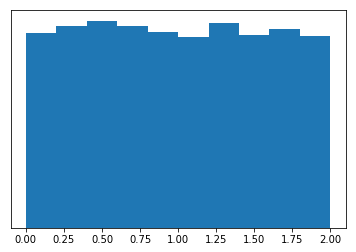

In [6]:
# Let us sample from different distributions and compute the sample mean

# Uniform

a=0;
b=2;
Xu = uniform(a, b)
Xu_samples = Xu.rvs(nSamples)
nBins=10;
hst = plt.hist(Xu_samples, bins=nBins, density=True,  rwidth=1)
plt.gca().axes.get_yaxis().set_visible(False)




[6.77716274 5.56029478 7.18335138 ... 5.82422364 9.48978415 5.17288392]


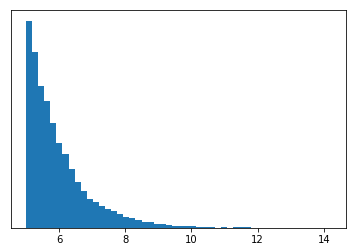

In [7]:
# Exponential
b =5
Xe = expon(b)
Xe_samples = Xe.rvs(nSamples)
hst = plt.hist(Xe_samples, bins=50,density=True,  rwidth=1)
plt.gca().axes.get_yaxis().set_visible(False)

print(Xe_samples)

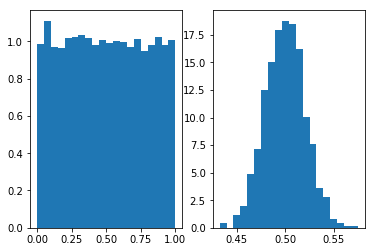

In [8]:
# CLT: Sample X1, ..., Xn from some distribution
#      Compute \bar Xn = (X1+..+Xn)/n
#      Repeat for nIters iterations and plot the distribution of \bar Xn

X = uniform(0,1)

X_samples = X.rvs(nSamples)
fig, (ax1, ax2) = plt.subplots(1,2) 
hst = ax1.hist(X_samples, bins=20,density=True)

nIters=1000;
n=200;
sample_means = [0]*nIters
for i in range(nIters):
    #print(X.rvs(n))
    sample_means[i] = np.mean(X.rvs(n))
                              
hst = ax2.hist(sample_means, bins=20,density=True)

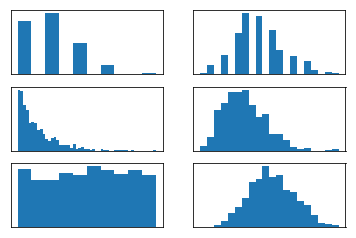

In [11]:
# CLT
nVars=5;
nIters=1000
Xbin_mean = [0]*nIters
Xe_mean = [0]*nIters
Xu_mean = [0]*nIters
for i in range(nIters):
    Xbin_samples = Xbin.rvs(nVars)
    Xbin_mean[i] = np.mean(Xbin_samples)
    
    Xe_samples = Xe.rvs(nVars)
    Xe_mean[i] = np.mean(Xe_samples)
    
    Xu_samples = Xu.rvs(nVars)
    Xu_mean[i] = np.mean(Xu_samples)
    
fig, (axes) = plt.subplots(3, 2)
for i in range(3):
    for j in range(2):
        axes[i, j].get_yaxis().set_visible(False)
        axes[i, j].get_xaxis().set_visible(False)
    
    
axes[0, 0].hist(Xbin.rvs(nIters));
axes[1, 0].hist(Xe.rvs(nIters), bins=50);
axes[2, 0].hist(Xu.rvs(nIters));

axes[0, 1].hist(Xbin_mean, bins=20);
axes[1, 1].hist(Xe_mean, bins=20);
axes[2, 1].hist(Xu_mean, bins=20);

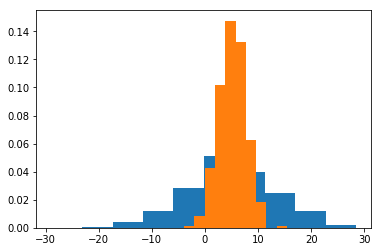

In [10]:
# Show that the sample mean has a smaller variance than the original distribution

# Bernoulli
import numpy as  np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson, uniform, expon, geom, norm

mu=5
s2 =8
nSamples=1000;


Xn= norm(mu, s2)
hst = plt.hist(Xn.rvs(nSamples),  density=True)

nIters=1000
nVars =10;
Xn_means = [0]*nIters
for iter in range(nIters):
    Xn_means[iter] = np.mean(Xn.rvs(nVars))

hst = plt.hist(Xn_means,  density=True)


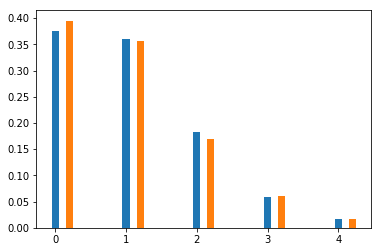

In [12]:
# poisson approximation for the binomial

Xbin = binom(1000, 0.001) # binomial with large n and small p
Xp = poisson(1000*0.001) # poisson with lambda = np

# sample from both
Xp_samples = Xp.rvs(nSamples) 
Xbin_samples = Xbin.rvs(nSamples)

# compute f(x) for both distributions
xp_prop = [np.sum(Xp_samples==i)/nSamples for i in range(Xp_samples.max())]
xb_prop = [np.sum(Xbin_samples==i)/nSamples for i in range(Xbin_samples.max())]

xs = range(Xp_samples.max()); # possible values of X for the binomial
xs2 =[x + 0.2 for x in range(Xbin_samples.max())]; # possible values for X+0.2 for visibility.

plt.bar(xs, xp_prop, width=0.1);
plt.bar(xs2, xb_prop, width=0.1);